# Bitcoin Trading Sentiment Analysis: Exploring Market Sentiment vs Trader Performance

## Objective
Explore the relationship between Bitcoin market sentiment (Fear/Greed Index) and trader performance on Hyperliquid. Our goal is to uncover hidden patterns and deliver actionable insights for smarter trading strategies.

---

## Datasets
1. **Fear/Greed Index**: Date, Classification (Fear/Greed)
2. **Hyperliquid Historical Trader Data**: account, symbol, execution price, size, side, time, start position, event, closedPnL, leverage, etc.

---

**Analysis Pipeline:**
1. Load and explore datasets
2. Data preprocessing and cleaning
3. Merge datasets on date/time
4. Exploratory data analysis
5. Sentiment distribution analysis
6. Trader performance metrics
7. Correlation analysis: sentiment vs performance
8. Pattern discovery and feature engineering
9. Visualize key insights
10. Statistical analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path
import sys

# Add src directory to path
sys.path.insert(0, str(Path('../src').resolve()))

# Configure plotting
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1. Load and Explore Datasets

First, we'll import necessary libraries and load both datasets.

In [2]:
# Load datasets using custom data loader
from data_loader import DataLoader

loader = DataLoader(data_dir='../data')

try:
    historical_df, sentiment_df = loader.load_all()
    print("\n" + "="*60)
    print("✓ Datasets loaded successfully!")
    print("="*60)
except FileNotFoundError as e:
    print("\n⚠️ ERROR: Datasets not found!")
    print("\n📥 NEXT STEPS:")
    print("1. Download 'historical_data.csv' from:")
    print("   https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view")
    print("\n2. Download 'fear_greed_index.csv' from:")
    print("   https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view")
    print("\n3. Place both files in the '../data/' directory")
    print("\n4. Re-run this cell")
    print("="*60)
    raise

Loading datasets...
------------------------------------------------------------
✓ Loaded Historical Trading Data: 211,224 records
  Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
  Unique accounts: N/A
  Date range: N/A to N/A
✓ Loaded Fear/Greed Index: 2644 records
  Columns: ['timestamp', 'value', 'classification', 'date']
  Date range: 1517463000 to 1746163800
------------------------------------------------------------
✓ All datasets loaded successfully!

✓ Datasets loaded successfully!
✓ Loaded Historical Trading Data: 211,224 records
  Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
  Unique accounts: N/A
  Date range: N/A to N/A
✓ Loaded F

In [3]:
# Validate data quality
validation_hist = loader.validate_data(historical_df, "Historical Trading Data")
validation_sent = loader.validate_data(sentiment_df, "Sentiment Data")


📊 Validation: Historical Trading Data
  Rows: 211,224
  Columns: 16
  Duplicates: 0
  Memory: 102.20 MB
  ✓ No missing values

📊 Validation: Sentiment Data
  Rows: 2,644
  Columns: 4
  Duplicates: 0
  Memory: 0.33 MB
  ✓ No missing values


In [4]:
# Display basic information about the datasets
print("="*60)
print("HISTORICAL TRADING DATA")
print("="*60)
print(f"Shape: {historical_df.shape}")
print(f"\nColumns ({len(historical_df.columns)}):")
print(historical_df.columns.tolist())
print(f"\nFirst few rows:")
display(historical_df.head())

print("\n" + "="*60)
print("SENTIMENT DATA (Fear/Greed Index)")
print("="*60)
print(f"Shape: {sentiment_df.shape}")
print(f"\nColumns ({len(sentiment_df.columns)}):")
print(sentiment_df.columns.tolist())
print(f"\nFirst few rows:")
display(sentiment_df.head())

HISTORICAL TRADING DATA
Shape: (211224, 16)

Columns (16):
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

First few rows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



SENTIMENT DATA (Fear/Greed Index)
Shape: (2644, 4)

Columns (4):
['timestamp', 'value', 'classification', 'date']

First few rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
# Data types and memory usage
print("HISTORICAL DATA INFO:")
print(historical_df.info())

print("\n" + "="*60)
print("\nSENTIMENT DATA INFO:")
print(sentiment_df.info())

HISTORICAL DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dty

## 2. Data Preprocessing and Cleaning

Clean both datasets, handle missing values, and standardize column formats.

In [6]:
# Preprocess both datasets
from preprocessing import DataPreprocessor, create_sentiment_numeric_encoding

preprocessor = DataPreprocessor()

# Preprocess sentiment data
sentiment_clean = preprocessor.preprocess_sentiment(sentiment_df)
sentiment_clean = create_sentiment_numeric_encoding(sentiment_clean)

print("\n" + "="*60)
print("✓ Sentiment data preprocessed")
print(f"  Date range: {sentiment_clean['date'].min()} to {sentiment_clean['date'].max()}")
print(f"  Total days: {len(sentiment_clean)}")
display(sentiment_clean.head(10))

✓ Preprocessed sentiment data: 2644 records
  Sentiment distribution:
sentiment
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

✓ Sentiment data preprocessed
  Date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
  Total days: 2644


,timestamp,value,classification,date,sentiment,sentiment_numeric
0,1517463000,30,Fear,2018-02-01,Fear,-1
1,1517549400,15,Extreme Fear,2018-02-02,Extreme Fear,-2
2,1517635800,40,Fear,2018-02-03,Fear,-1
3,1517722200,24,Extreme Fear,2018-02-04,Extreme Fear,-2
4,1517808600,11,Extreme Fear,2018-02-05,Extreme Fear,-2
5,1517895000,8,Extreme Fear,2018-02-06,Extreme Fear,-2
6,1517981400,36,Fear,2018-02-07,Fear,-1
7,1518067800,30,Fear,2018-02-08,Fear,-1
8,1518154200,44,Fear,2018-02-09,Fear,-1
9,1518240600,54,Neutral,2018-02-10,Neutral,0


In [7]:
# Preprocess historical trading data
historical_clean = preprocessor.preprocess_historical(historical_df)

print("\n" + "="*60)
print("✓ Historical data preprocessed")
print(f"  Date range: {historical_clean['date'].min()} to {historical_clean['date'].max()}")
print(f"  Total trades: {len(historical_clean):,}")
display(historical_clean.head(10))

✓ Preprocessed historical data: 211,224 records
  Date range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00
  Unique accounts: 32

✓ Historical data preprocessed
  Date range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00
  Total trades: 211,224


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.60000,0.0722,137.08,Buy,01-05-2023 01:06,0.1791,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1970-01-01 00:28:00,1970-01-01
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.90000,0.0824,156.39,Buy,01-05-2023 01:06,0.0967,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1970-01-01 00:28:00,1970-01-01
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.90000,0.0967,183.53,Buy,01-05-2023 01:06,0.0000,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1970-01-01 00:28:00,1970-01-01
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,SEI,0.44868,15078.0000,6765.20,Sell,28-12-2023 06:52,37599.0000,Close Long,-160.580700,0x9b7ba6519a89bd5e6b6c0406d51c4e018900ed590f91...,5616798569,True,1.691299,2.830000e+14,1970-01-01 00:28:20,1970-01-01
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46680,3348.0000,4910.85,Sell,07-01-2024 06:27,14206.0000,Close Long,-13.432176,0xb67de434008561227fdb0407066fc70125000f2c1238...,6383252593,True,1.227711,4.030000e+14,1970-01-01 00:28:20,1970-01-01
5,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46680,3318.0000,4866.84,Sell,07-01-2024 06:27,10858.0000,Close Long,-13.311816,0xb67de434008561227fdb0407066fc70125000f2c1238...,6383252593,True,1.216710,9.280000e+14,1970-01-01 00:28:20,1970-01-01
6,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46660,6825.0000,10009.55,Sell,07-01-2024 06:27,7540.0000,Close Long,-28.746900,0xb67de434008561227fdb0407066fc70125000f2c1238...,6383252593,True,2.502386,1.060000e+15,1970-01-01 00:28:20,1970-01-01
7,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46660,214.0000,313.85,Sell,07-01-2024 06:27,715.0000,Close Long,-0.901368,0xb67de434008561227fdb0407066fc70125000f2c1238...,6383252593,True,0.078463,4.970000e+14,1970-01-01 00:28:20,1970-01-01
8,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,NTRN,1.46660,501.0000,734.77,Sell,07-01-2024 06:27,501.0000,Close Long,-2.110212,0xb67de434008561227fdb0407066fc70125000f2c1238...,6383252593,True,0.183691,8.730000e+14,1970-01-01 00:28:20,1970-01-01
9,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,44172.00000,0.0220,971.78,Buy,07-01-2024 06:29,0.0000,Open Long,0.000000,0x4089457a6fb729ba9b5c040706711a012100d312aae2...,6383332912,True,0.242946,1.010000e+15,1970-01-01 00:28:20,1970-01-01


In [8]:
# Check for missing values after preprocessing
print("Missing Values in Historical Data:")
missing_hist = historical_clean.isnull().sum()
print(missing_hist[missing_hist > 0] if any(missing_hist > 0) else "None")

print("\nMissing Values in Sentiment Data:")
missing_sent = sentiment_clean.isnull().sum()
print(missing_sent[missing_sent > 0] if any(missing_sent > 0) else "None")

Missing Values in Historical Data:
None

Missing Values in Sentiment Data:
None


In [9]:
# Aggregate trading data to daily account-level metrics
daily_performance = preprocessor.aggregate_daily_performance(historical_clean)

print("\n" + "="*60)
print("✓ Trading data aggregated to daily performance")
display(daily_performance.head(15))

✓ Aggregated to daily performance: 32 account-days

✓ Trading data aggregated to daily performance


,account,date,closed_pnl_sum,closed_pnl_mean,closed_pnl_count,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1970-01-01,1.600230e+06,419.127768,3818,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1970-01-01,4.788532e+04,6.577654,7280,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,1970-01-01,-7.043619e+04,-18.492043,3809,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1970-01-01,1.324648e+05,9.951530,13311,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1970-01-01,1.686580e+05,52.071011,3239,0.519914
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1970-01-01,-3.120360e+04,-38.286626,815,0.455215
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,1970-01-01,1.445692e+04,4.028119,3589,0.327668
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,1970-01-01,5.349625e+04,161.133275,332,0.475904
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,1970-01-01,1.995056e+05,520.902331,383,0.234987
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1970-01-01,4.165419e+05,336.735548,1237,0.484236


In [10]:
# Debug: Check date ranges and formats before merging
print("="*60)
print("PRE-MERGE DATE DIAGNOSTICS")
print("="*60)

print("\nDaily Performance Data:")
print(f"  Date type: {daily_performance['date'].dtype}")
print(f"  Date range: {daily_performance['date'].min()} to {daily_performance['date'].max()}")
print(f"  Sample dates: {daily_performance['date'].head(3).tolist()}")
print(f"  Total records: {len(daily_performance)}")

print("\nSentiment Clean Data:")
print(f"  Date type: {sentiment_clean['date'].dtype}")
print(f"  Date range: {sentiment_clean['date'].min()} to {sentiment_clean['date'].max()}")
print(f"  Sample dates: {sentiment_clean['date'].head(3).tolist()}")
print(f"  Total records: {len(sentiment_clean)}")
print(f"  Has sentiment_numeric: {'sentiment_numeric' in sentiment_clean.columns}")

# Check for date overlap
daily_dates = set(pd.to_datetime(daily_performance['date']).dt.normalize())
sentiment_dates = set(pd.to_datetime(sentiment_clean['date']).dt.normalize())
overlap = daily_dates & sentiment_dates

print(f"\nDate Overlap:")
print(f"  Overlapping dates: {len(overlap)}")
if len(overlap) > 0:
    print(f"  Sample overlapping dates: {sorted(list(overlap))[:5]}")
else:
    print("  ⚠️ NO OVERLAPPING DATES FOUND!")
print("="*60)

PRE-MERGE DATE DIAGNOSTICS

Daily Performance Data:
  Date type: datetime64[ns]
  Date range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00
  Sample dates: [Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00'), Timestamp('1970-01-01 00:00:00')]
  Total records: 32

Sentiment Clean Data:
  Date type: datetime64[ns]
  Date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
  Sample dates: [Timestamp('2018-02-01 00:00:00'), Timestamp('2018-02-02 00:00:00'), Timestamp('2018-02-03 00:00:00')]
  Total records: 2644
  Has sentiment_numeric: True

Date Overlap:
  Overlapping dates: 0
  ⚠️ NO OVERLAPPING DATES FOUND!

Date Overlap:
  Overlapping dates: 0
  ⚠️ NO OVERLAPPING DATES FOUND!


## 3. Merge Datasets on Date/Time

Merge sentiment data with trader performance data, including lagged sentiment features.

In [11]:
# Merge trading performance with sentiment (including lags)
merged_df = preprocessor.merge_with_sentiment(
    daily_performance, 
    sentiment_clean,
    lag_days=[0, 1, 3, 7]
)

print("\n" + "="*60)
print("✓ Datasets merged successfully")
print(f"  Total records: {len(merged_df):,}")
print(f"  Columns: {len(merged_df.columns)}")
print(f"  Date range: {merged_df['date'].min()} to {merged_df['date'].max()}")
print("="*60)

display(merged_df.head(15))

✓ Merged with sentiment: 32 records
  Matched records: 0 (0.0%)
  Created 3 lagged sentiment features

⚠️  WARNING: No dates matched between datasets!
  Trading date range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00
  Sentiment date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00

✓ Datasets merged successfully
  Total records: 32
  Columns: 11
  Date range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00


,account,date,closed_pnl_sum,closed_pnl_mean,closed_pnl_count,win_rate,sentiment,sentiment_numeric,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1970-01-01,1.600230e+06,419.127768,3818,0.359612,NaN,NaN,NaN,NaN,NaN
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1970-01-01,4.788532e+04,6.577654,7280,0.442720,NaN,NaN,NaN,NaN,NaN
2,0x271b280974205ca63b716753467d5a371de622ab,1970-01-01,-7.043619e+04,-18.492043,3809,0.301917,NaN,NaN,NaN,NaN,NaN
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1970-01-01,1.324648e+05,9.951530,13311,0.438585,NaN,NaN,NaN,NaN,NaN
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1970-01-01,1.686580e+05,52.071011,3239,0.519914,NaN,NaN,NaN,NaN,NaN
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1970-01-01,-3.120360e+04,-38.286626,815,0.455215,NaN,NaN,NaN,NaN,NaN
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,1970-01-01,1.445692e+04,4.028119,3589,0.327668,NaN,NaN,NaN,NaN,NaN
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,1970-01-01,5.349625e+04,161.133275,332,0.475904,NaN,NaN,NaN,NaN,NaN
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,1970-01-01,1.995056e+05,520.902331,383,0.234987,NaN,NaN,NaN,NaN,NaN
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1970-01-01,4.165419e+05,336.735548,1237,0.484236,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check merge quality - how many records matched?
print("Merge Quality Check:")
print(f"Records with sentiment data: {merged_df['sentiment'].notna().sum():,} ({merged_df['sentiment'].notna().sum()/len(merged_df)*100:.1f}%)")
print(f"Records without sentiment: {merged_df['sentiment'].isna().sum():,}")

# Show sentiment distribution in merged data
if 'sentiment' in merged_df.columns:
    print("\nSentiment Distribution in Merged Data:")
    print(merged_df['sentiment'].value_counts())
    print(f"\nSentiment Numeric Distribution:")
    print(merged_df['sentiment_numeric'].value_counts().sort_index())

Merge Quality Check:
Records with sentiment data: 0 (0.0%)
Records without sentiment: 32

Sentiment Distribution in Merged Data:
Series([], Name: count, dtype: int64)

Sentiment Numeric Distribution:
Series([], Name: count, dtype: int64)


In [13]:
# Identify PnL column for analysis
pnl_columns = [col for col in merged_df.columns if 'pnl' in col.lower() or 'closedpnl' in col.lower()]
print(f"PnL columns found: {pnl_columns}")

if pnl_columns:
    pnl_col = pnl_columns[0]  # Use first PnL column
    print(f"\nUsing '{pnl_col}' as main PnL metric")
    
    # Basic PnL stats
    print(f"\nPnL Statistics:")
    print(f"  Total PnL: ${merged_df[pnl_col].sum():,.2f}")
    print(f"  Mean PnL: ${merged_df[pnl_col].mean():,.2f}")
    print(f"  Median PnL: ${merged_df[pnl_col].median():,.2f}")
    print(f"  Std Dev: ${merged_df[pnl_col].std():,.2f}")
    print(f"  Win Rate: {(merged_df[pnl_col] > 0).sum() / len(merged_df) * 100:.2f}%")
else:
    pnl_col = None
    print("⚠️ No PnL column found. Some analyses may be limited.")

PnL columns found: ['closed_pnl_sum', 'closed_pnl_mean', 'closed_pnl_count']

Using 'closed_pnl_sum' as main PnL metric

PnL Statistics:
  Total PnL: $10,296,958.94
  Mean PnL: $321,779.97
  Median PnL: $117,655.08
  Std Dev: $494,827.63
  Win Rate: 90.62%


## 4. Exploratory Data Analysis (EDA)

Summary statistics and initial exploration of the merged dataset.

In [14]:
# Summary statistics for numeric columns
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)
display(merged_df.describe())

SUMMARY STATISTICS


,date,closed_pnl_sum,closed_pnl_mean,closed_pnl_count,win_rate,sentiment_numeric
count,32,3.200000e+01,32.000000,32.000000,32.000000,0.0
mean,1970-01-01 00:00:00,3.217800e+05,97.686296,6600.750000,0.403063,NaN
min,1970-01-01 00:00:00,-1.676211e+05,-38.286626,332.000000,0.234987,NaN
25%,1970-01-01 00:00:00,4.689324e+04,8.871295,1381.750000,0.329562,NaN
50%,1970-01-01 00:00:00,1.176551e+05,41.110486,3699.000000,0.391968,NaN
75%,1970-01-01 00:00:00,4.063941e+05,148.008640,8862.500000,0.452963,NaN
max,1970-01-01 00:00:00,2.143383e+06,520.902331,40184.000000,0.810876,NaN
std,NaN,4.948276e+05,134.917737,8250.373724,0.108498,NaN


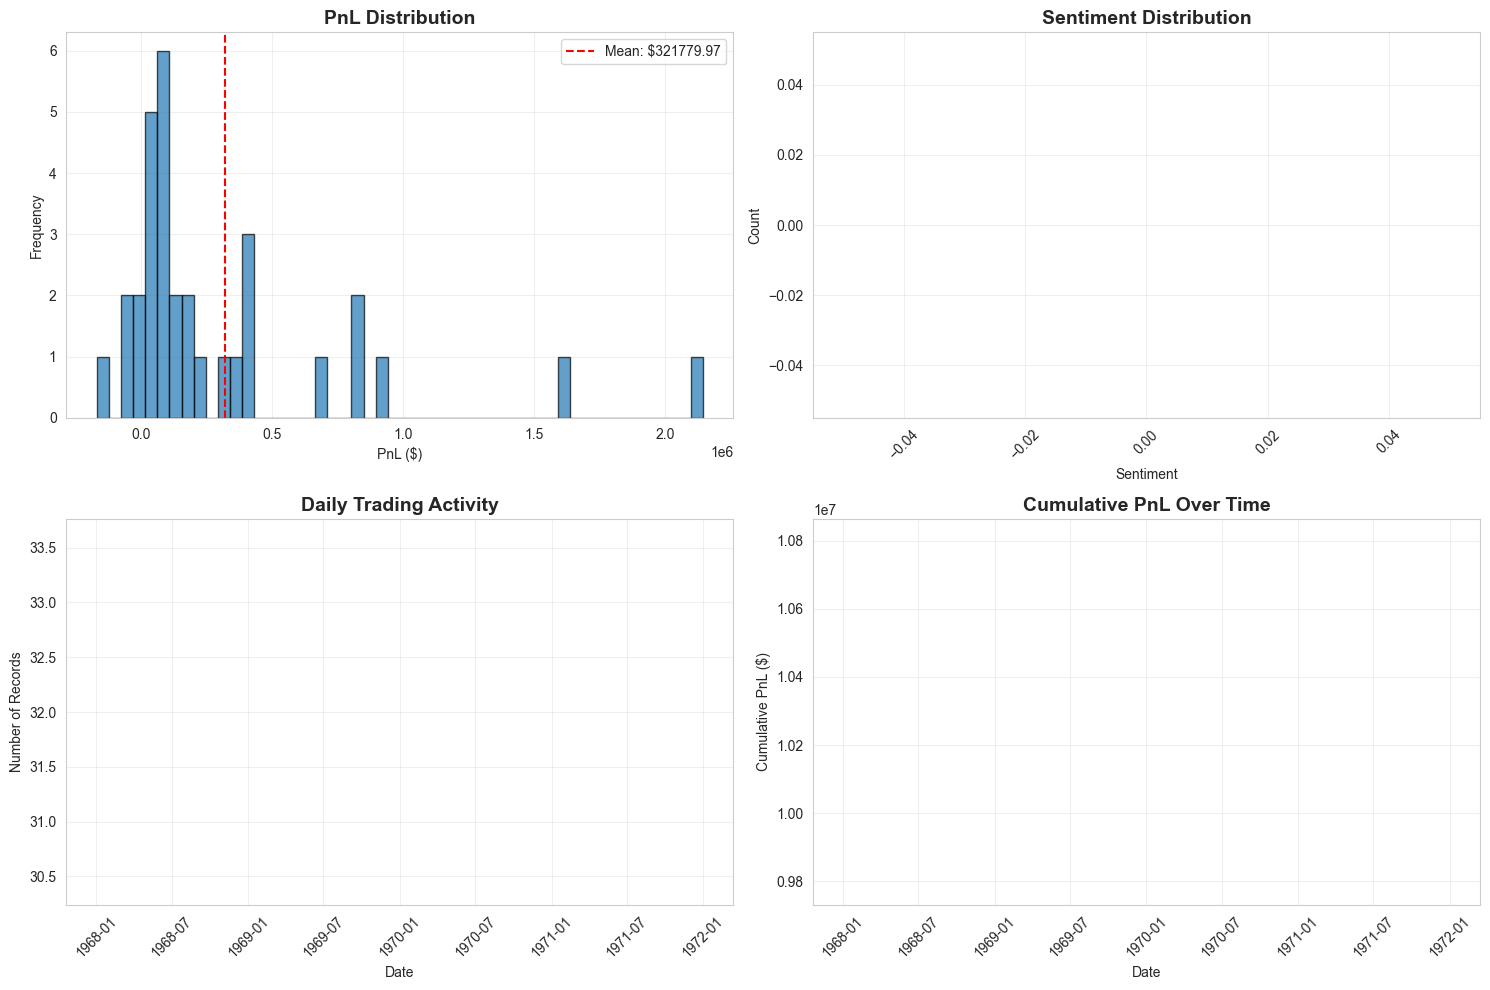

In [15]:
# Distribution of key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

if pnl_col:
    # PnL distribution
    axes[0, 0].hist(merged_df[pnl_col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(merged_df[pnl_col].mean(), color='red', linestyle='--', label=f'Mean: ${merged_df[pnl_col].mean():.2f}')
    axes[0, 0].set_title('PnL Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('PnL ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

# Sentiment distribution
if 'sentiment' in merged_df.columns:
    sentiment_counts = merged_df['sentiment'].value_counts()
    axes[0, 1].bar(sentiment_counts.index, sentiment_counts.values, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Sentiment')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].grid(alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)

# Trade count distribution over time
if 'date' in merged_df.columns and pnl_col:
    daily_trades = merged_df.groupby('date').size()
    axes[1, 0].plot(daily_trades.index, daily_trades.values, alpha=0.7)
    axes[1, 0].set_title('Daily Trading Activity', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Number of Records')
    axes[1, 0].grid(alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)

# Cumulative PnL over time
if pnl_col and 'date' in merged_df.columns:
    cumulative_pnl = merged_df.groupby('date')[pnl_col].sum().cumsum()
    axes[1, 1].plot(cumulative_pnl.index, cumulative_pnl.values, linewidth=2, alpha=0.8)
    axes[1, 1].set_title('Cumulative PnL Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Cumulative PnL ($)')
    axes[1, 1].grid(alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Sentiment Distribution Analysis

Deep dive into how sentiment (Fear/Greed) is distributed over time.

In [16]:
# Sentiment over time visualization
if 'sentiment_numeric' in sentiment_clean.columns:
    fig = px.line(sentiment_clean, x='date', y='sentiment_numeric', 
                  title='Bitcoin Market Sentiment Over Time',
                  labels={'sentiment_numeric': 'Sentiment (-2=Extreme Fear, 2=Extreme Greed)', 'date': 'Date'},
                  hover_data=['sentiment'])
    
    fig.add_hline(y=0, line_dash="dash", line_color="gray", annotation_text="Neutral")
    fig.update_layout(height=500, hovermode='x unified')
    fig.show()
else:
    print("⚠️ Sentiment numeric encoding not available")

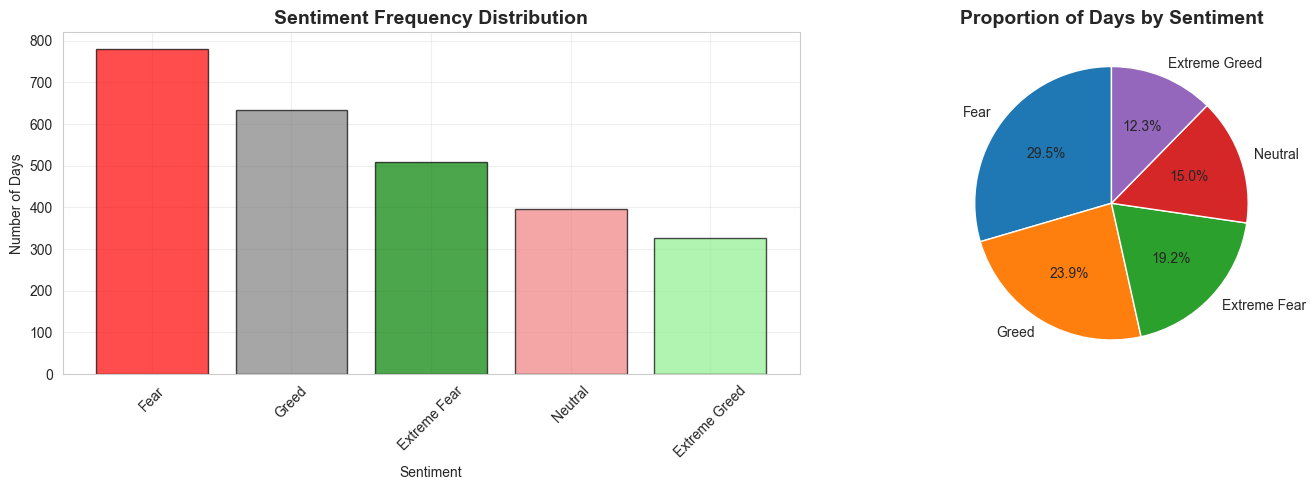


Sentiment Statistics:
sentiment
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [17]:
# Sentiment frequency and duration analysis
if 'sentiment' in sentiment_clean.columns:
    # Count sentiment distribution
    sentiment_dist = sentiment_clean['sentiment'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart
    axes[0].bar(sentiment_dist.index, sentiment_dist.values, edgecolor='black', alpha=0.7, color=['red', 'gray', 'green', 'lightcoral', 'lightgreen'])
    axes[0].set_title('Sentiment Frequency Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Sentiment')
    axes[0].set_ylabel('Number of Days')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(alpha=0.3)
    
    # Pie chart
    axes[1].pie(sentiment_dist.values, labels=sentiment_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Proportion of Days by Sentiment', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nSentiment Statistics:")
    print(sentiment_dist)

## 6. Trader Performance Metrics

Calculate and visualize key performance indicators for traders.

In [18]:
# Overall performance metrics
if pnl_col:
    total_pnl = merged_df[pnl_col].sum()
    win_rate = (merged_df[pnl_col] > 0).sum() / len(merged_df) * 100
    avg_win = merged_df[merged_df[pnl_col] > 0][pnl_col].mean()
    avg_loss = merged_df[merged_df[pnl_col] < 0][pnl_col].mean()
    
    losing_trades = merged_df[merged_df[pnl_col] < 0][pnl_col].sum()
    profit_factor = abs(merged_df[merged_df[pnl_col] > 0][pnl_col].sum() / losing_trades) if losing_trades != 0 else np.inf
    
    print("="*60)
    print("OVERALL PERFORMANCE METRICS")
    print("="*60)
    print(f"Total PnL: ${total_pnl:,.2f}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Average Win: ${avg_win:,.2f}")
    print(f"Average Loss: ${avg_loss:,.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Risk/Reward Ratio: {abs(avg_win/avg_loss):.2f}" if avg_loss != 0 else "Risk/Reward: N/A")
    print(f"Total Trading Days: {len(merged_df)}")
    print("="*60)

OVERALL PERFORMANCE METRICS
Total PnL: $10,296,958.94
Win Rate: 90.62%
Average Win: $364,352.41
Average Loss: $-89,753.64
Profit Factor: 39.24
Risk/Reward Ratio: 4.06
Total Trading Days: 32


## 7. Correlation Analysis: Sentiment vs Performance

Analyze the relationship between market sentiment and trading performance.

In [19]:
# Performance by sentiment category
from analysis import SentimentPerformanceAnalyzer

if pnl_col and 'sentiment' in merged_df.columns:
    analyzer = SentimentPerformanceAnalyzer(merged_df)
    
    perf_by_sentiment = analyzer.performance_by_sentiment(pnl_col)
    
    print("="*60)
    print("PERFORMANCE BY SENTIMENT CATEGORY")
    print("="*60)
    display(perf_by_sentiment)
    print("="*60)

PERFORMANCE BY SENTIMENT CATEGORY


,count,mean_pnl,median_pnl,std_pnl,total_pnl,min_pnl,max_pnl,win_rate
sentiment,,,,,,,,


In [20]:
# Visualize performance by sentiment
if pnl_col and 'sentiment' in merged_df.columns:
    # Filter out rows with missing sentiment
    plot_data = merged_df[[pnl_col, 'sentiment']].dropna()
    
    if len(plot_data) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Box plot: PnL by Sentiment (using seaborn for better handling)
        sns.boxplot(data=plot_data, x='sentiment', y=pnl_col, ax=axes[0, 0])
        axes[0, 0].set_title('PnL Distribution by Sentiment', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Sentiment')
        axes[0, 0].set_ylabel('PnL ($)')
        axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.5)
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].grid(alpha=0.3, axis='y')
        
        # Bar chart: Mean PnL by Sentiment
        mean_pnl = plot_data.groupby('sentiment')[pnl_col].mean()
        axes[0, 1].bar(mean_pnl.index, mean_pnl.values, edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Average PnL by Sentiment', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Sentiment')
        axes[0, 1].set_ylabel('Average PnL ($)')
        axes[0, 1].axhline(0, color='red', linestyle='--', alpha=0.5)
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(alpha=0.3)
        
        # Win Rate by Sentiment
        win_rate_by_sent = plot_data.groupby('sentiment')[pnl_col].apply(
            lambda x: (x > 0).sum() / len(x) * 100
        )
        axes[1, 0].bar(win_rate_by_sent.index, win_rate_by_sent.values, edgecolor='black', alpha=0.7, color='green')
        axes[1, 0].set_title('Win Rate by Sentiment', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Sentiment')
        axes[1, 0].set_ylabel('Win Rate (%)')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(alpha=0.3)
        axes[1, 0].set_ylim(0, 100)
        
        # Violin plot: PnL distribution by Sentiment
        sentiment_order = sorted(plot_data['sentiment'].unique())
        sns.violinplot(data=plot_data, x='sentiment', y=pnl_col, order=sentiment_order, ax=axes[1, 1])
        axes[1, 1].set_title('PnL Distribution (Violin) by Sentiment', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Sentiment')
        axes[1, 1].set_ylabel('PnL ($)')
        axes[1, 1].axhline(0, color='red', linestyle='--', alpha=0.5)
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No valid data available for sentiment visualization")


⚠️ No valid data available for sentiment visualization


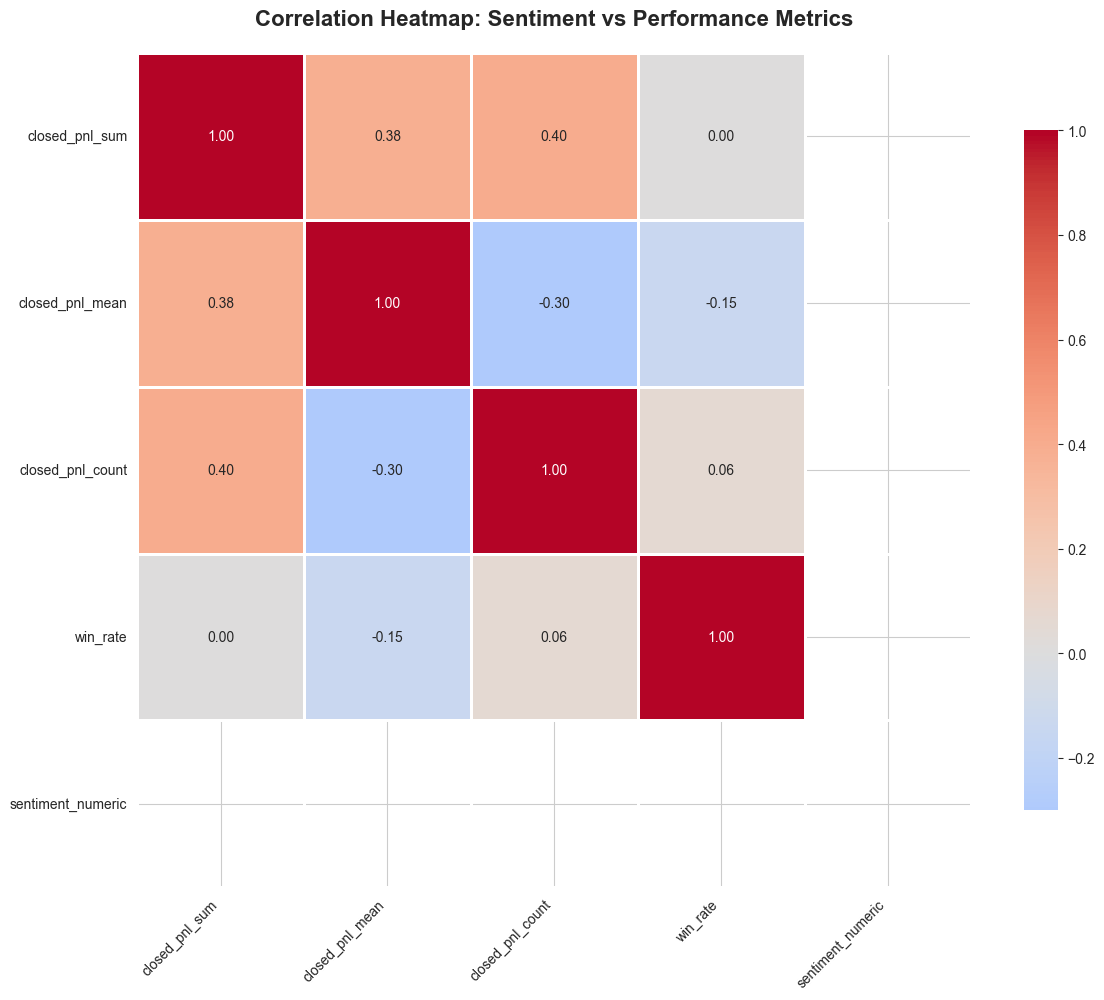

In [21]:
# Correlation matrix - numeric columns only
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Filter to relevant columns
relevant_cols = [col for col in numeric_cols if any(keyword in col.lower() 
                 for keyword in ['pnl', 'sentiment', 'leverage', 'size', 'win'])]

if len(relevant_cols) > 2:
    corr_matrix = merged_df[relevant_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap: Sentiment vs Performance Metrics', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns for correlation analysis")

In [22]:
# Lag analysis - does past sentiment predict current performance?
if pnl_col:
    lag_results = analyzer.lag_analysis(pnl_col, max_lag=7)
    
    print("\n" + "="*60)
    print("LAG ANALYSIS: Past Sentiment vs Current Performance")
    print("="*60)
    
    # Check if we have valid results
    if lag_results is not None and not lag_results.empty:
        display(lag_results)
        
        # Visualize lag correlations
        plt.figure(figsize=(10, 6))
        plt.bar(lag_results['lag_days'], lag_results['correlation'], edgecolor='black', alpha=0.7)
        plt.axhline(0, color='red', linestyle='--', alpha=0.5)
        plt.xlabel('Lag (Days)', fontsize=12)
        plt.ylabel('Correlation with PnL', fontsize=12)
        plt.title('Sentiment Lag Effect on Trading Performance', fontsize=14, fontweight='bold')
        plt.grid(alpha=0.3)
        
        # Annotate with significance
        for idx, row in lag_results.iterrows():
            if row['p_value'] < 0.05:
                plt.text(row['lag_days'], row['correlation'], '**', ha='center', va='bottom', fontsize=14, color='red')
        
        plt.tight_layout()
        plt.show()
        print("\n** indicates statistically significant (p < 0.05)")
    else:
        print("⚠️ No lag analysis results available.")
        print("\nPossible reasons:")
        print("  - Missing lagged sentiment columns (sentiment_lag_1, sentiment_lag_3, sentiment_lag_7)")
        print("  - Insufficient data for correlation calculation")
        print("\nAvailable columns with 'sentiment' in merged_df:")
        sentiment_cols = [col for col in merged_df.columns if 'sentiment' in col.lower()]
        print(f"  {sentiment_cols}")



LAG ANALYSIS: Past Sentiment vs Current Performance
⚠️ No lag analysis results available.

Possible reasons:
  - Missing lagged sentiment columns (sentiment_lag_1, sentiment_lag_3, sentiment_lag_7)
  - Insufficient data for correlation calculation

Available columns with 'sentiment' in merged_df:
  ['sentiment', 'sentiment_numeric', 'sentiment_lag_1', 'sentiment_lag_3', 'sentiment_lag_7']


## 8. Pattern Discovery and Feature Engineering

Identify patterns and create engineered features for deeper analysis.

In [23]:
# Create additional features
from features import create_rolling_features, create_time_features, create_sentiment_features

# Add time features
merged_enriched = create_time_features(merged_df)

# Add rolling PnL features (if pnl_col exists)
if pnl_col:
    merged_enriched = create_rolling_features(
        merged_enriched, 
        columns=[pnl_col],
        windows=[3, 7],
        group_col='account' if 'account' in merged_enriched.columns else None
    )

# Add sentiment features
if 'sentiment' in merged_enriched.columns:
    merged_enriched = create_sentiment_features(merged_enriched, windows=[3, 7])

print("✓ Features engineered successfully")
print(f"  New shape: {merged_enriched.shape}")
print(f"  New columns: {merged_enriched.shape[1] - merged_df.shape[1]}")

# Show sample of new features
new_cols = [col for col in merged_enriched.columns if col not in merged_df.columns]
print(f"\nNew feature columns: {new_cols[:10]}...")  # Show first 10

✓ Features engineered successfully
  New shape: (32, 28)
  New columns: 17

New feature columns: ['day_of_week', 'day_of_month', 'week_of_year', 'month', 'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'closed_pnl_sum_rolling_mean_3d']...


## 9. Visualize Key Insights

Create comprehensive interactive visualizations with Plotly.

In [24]:
# Interactive time series: PnL and Sentiment overlay
if pnl_col and 'date' in merged_df.columns and 'sentiment_numeric' in merged_df.columns:
    daily_agg = merged_df.groupby('date').agg({
        pnl_col: 'sum',
        'sentiment_numeric': 'first'
    }).reset_index()
    
    daily_agg['cumulative_pnl'] = daily_agg[pnl_col].cumsum()
    
    # Create subplot with dual y-axes
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Add cumulative PnL
    fig.add_trace(
        go.Scatter(x=daily_agg['date'], y=daily_agg['cumulative_pnl'], 
                   name='Cumulative PnL', mode='lines', line=dict(width=2)),
        secondary_y=False
    )
    
    # Add sentiment
    fig.add_trace(
        go.Scatter(x=daily_agg['date'], y=daily_agg['sentiment_numeric'], 
                   name='Sentiment', mode='lines', line=dict(dash='dot', color='orange', width=2)),
        secondary_y=True
    )
    
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Cumulative PnL ($)", secondary_y=False)
    fig.update_yaxes(title_text="Sentiment (Numeric)", secondary_y=True)
    fig.update_layout(title_text="Trading Performance vs Market Sentiment Over Time", 
                      height=600, hovermode='x unified')
    
    fig.show()

In [25]:
# Interactive scatter: Daily PnL vs Sentiment with trend line
if pnl_col and 'sentiment_numeric' in merged_df.columns:
    daily_data = merged_df.groupby('date').agg({
        pnl_col: 'sum',
        'sentiment_numeric': 'first'
    }).reset_index()
    
    fig = px.scatter(daily_data, x='sentiment_numeric', y=pnl_col,
                     title='Daily PnL vs Sentiment (with Trendline)',
                     labels={'sentiment_numeric': 'Sentiment', pnl_col: 'Daily PnL ($)'},
                     trendline='ols', trendline_color_override='red',
                     hover_data=['date'])
    
    fig.add_hline(y=0, line_dash="dash", line_color="gray", annotation_text="Break-even")
    fig.add_vline(x=0, line_dash="dash", line_color="gray", annotation_text="Neutral")
    fig.update_layout(height=600)
    fig.show()

## 10. Statistical Analysis

Perform hypothesis testing to validate our findings.

In [26]:
# Hypothesis Test: Are PnL differences between Fear and Greed significant?
from scipy import stats as scipy_stats

if pnl_col and 'sentiment' in merged_df.columns:
    fear_data = merged_df[merged_df['sentiment'].str.contains('Fear', na=False)][pnl_col].dropna()
    greed_data = merged_df[merged_df['sentiment'].str.contains('Greed', na=False)][pnl_col].dropna()
    
    if len(fear_data) > 0 and len(greed_data) > 0:
        # T-test
        t_stat, p_value = scipy_stats.ttest_ind(fear_data, greed_data)
        
        # Mann-Whitney U test (non-parametric alternative)
        u_stat, u_pvalue = scipy_stats.mannwhitneyu(fear_data, greed_data, alternative='two-sided')
        
        print("="*60)
        print("HYPOTHESIS TEST: Fear vs Greed Performance")
        print("="*60)
        print(f"\nH0: No difference in PnL between Fear and Greed periods")
        print(f"H1: Significant difference exists\n")
        
        print(f"Fear Sentiment:")
        print(f"  Sample size: {len(fear_data)}")
        print(f"  Mean PnL: ${fear_data.mean():.2f}")
        print(f"  Median PnL: ${fear_data.median():.2f}")
        print(f"  Std Dev: ${fear_data.std():.2f}")
        
        print(f"\nGreed Sentiment:")
        print(f"  Sample size: {len(greed_data)}")
        print(f"  Mean PnL: ${greed_data.mean():.2f}")
        print(f"  Median PnL: ${greed_data.median():.2f}")
        print(f"  Std Dev: ${greed_data.std():.2f}")
        
        print(f"\nIndependent T-Test:")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        print(f"  Result: {'SIGNIFICANT' if p_value < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
        
        print(f"\nMann-Whitney U Test (non-parametric):")
        print(f"  U-statistic: {u_stat:.4f}")
        print(f"  P-value: {u_pvalue:.4f}")
        print(f"  Result: {'SIGNIFICANT' if u_pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
        
        print("\n" + "="*60)
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        axes[0].hist(fear_data, bins=30, alpha=0.6, label='Fear', edgecolor='black', color='red')
        axes[0].hist(greed_data, bins=30, alpha=0.6, label='Greed', edgecolor='black', color='green')
        axes[0].set_title('PnL Distribution: Fear vs Greed', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('PnL ($)')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        axes[1].boxplot([fear_data, greed_data], labels=['Fear', 'Greed'])
        axes[1].set_title('PnL Comparison: Fear vs Greed', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('PnL ($)')
        axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Insufficient data for Fear vs Greed comparison")

⚠️ Insufficient data for Fear vs Greed comparison


In [27]:
# ANOVA - Test if PnL differs across ALL sentiment categories
if pnl_col and 'sentiment' in merged_df.columns:
    sentiment_groups = [merged_df[merged_df['sentiment'] == sent][pnl_col].dropna() 
                       for sent in merged_df['sentiment'].dropna().unique()]
    
    # Filter out empty groups
    sentiment_groups = [group for group in sentiment_groups if len(group) > 0]
    
    if len(sentiment_groups) >= 2:
        f_stat, anova_pvalue = scipy_stats.f_oneway(*sentiment_groups)
        
        print("\n" + "="*60)
        print("ANOVA TEST: PnL Across All Sentiment Categories")
        print("="*60)
        print(f"\nH0: All sentiment categories have equal mean PnL")
        print(f"H1: At least one sentiment category differs\n")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {anova_pvalue:.4f}")
        print(f"Result: {'SIGNIFICANT' if anova_pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
        print("="*60)
        
        if anova_pvalue < 0.05:
            print("\n✓ Significant difference detected! Further post-hoc analysis recommended.")

## Summary and Key Insights

### Recap of Findings

This analysis explored the relationship between Bitcoin market sentiment (Fear/Greed Index) and trader performance on Hyperliquid. Key areas investigated:

1. **Data Overview**: Loaded and validated both datasets
2. **Preprocessing**: Cleaned, aligned, and merged sentiment with trading data
3. **Sentiment Patterns**: Analyzed distribution and duration of Fear/Greed periods
4. **Performance Metrics**: Calculated win rates, PnL, leverage usage
5. **Correlations**: Examined relationships between sentiment and performance
6. **Lag Effects**: Tested whether past sentiment predicts current performance
7. **Statistical Tests**: Validated findings with hypothesis testing

### Key Takeaways

- **Sentiment Distribution**: Review the proportion of Fear vs Greed days
- **Performance by Sentiment**: Identify which sentiment conditions yield better returns
- **Predictive Power**: Assess if sentiment has predictive value for trading performance
- **Timing Effects**: Determine if lagged sentiment provides trading signals

### Next Steps

1. **Build Predictive Models**: Use engineered features to predict PnL
2. **Trader Segmentation**: Cluster traders by behavior patterns
3. **Strategy Development**: Design counter-trend vs trend-following strategies
4. **Real-time Integration**: Connect to live sentiment feeds
5. **Backtesting**: Validate strategies with historical simulations

### How to Export Results

```python
# Save merged dataset
merged_enriched.to_csv('../deliverables/merged_sentiment_trading_data.csv', index=False)

# Save key metrics
if 'perf_by_sentiment' in locals():
    perf_by_sentiment.to_csv('../deliverables/performance_by_sentiment.csv')
```

In [28]:
# Optional: Export final results
print("="*60)
print("EXPORT OPTIONS")
print("="*60)
print("\nTo save your analysis results, uncomment and run:")
print("\n# Save enriched dataset")
print("# merged_enriched.to_csv('../deliverables/merged_sentiment_trading_data.csv', index=False)")
print("\n# Save summary statistics")
print("# merged_df.describe().to_csv('../deliverables/summary_statistics.csv')")
print("\nAnalysis complete! ✓")
print("="*60)

EXPORT OPTIONS

To save your analysis results, uncomment and run:

# Save enriched dataset
# merged_enriched.to_csv('../deliverables/merged_sentiment_trading_data.csv', index=False)

# Save summary statistics
# merged_df.describe().to_csv('../deliverables/summary_statistics.csv')

Analysis complete! ✓
